# PM10 Monitoring using CAMS data
Atmospheric aerosol measurements are performed from sensors on board satellite. The Copericus Sentinel 5-p provides data about the UV Aerosol Index and the Aerosol Layer Height. For more info see the [TROPOMI Products and Algorithms](https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-5p/products-algorithms) and the Algorithm Theoretical Basis Documents (ATDB), ATDB-AI and ATDB-LH respectively.    

In [79]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cdsapi
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print('python version: %s'%python_version())
print('pandas version: %s'%pd.__version__)
print('xarray version: %s'%xr.__version__)
print('Matplotlib version: %s'%matplotlib.__version__)

python version: 3.11.5
pandas version: 2.1.1
xarray version: 2023.12.0
Matplotlib version: 3.8.0


In [147]:
time_interval = pd.date_range(start='2024-03-25', end='2024-03-28', freq='12h')
t0 = time_interval[0]
t1= time_interval[1]
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [158]:
from datetime import datetime
start_day = datetime(2024, 3, 25)
end_day = datetime(2024, 3, 28)
start_day

datetime.datetime(2024, 3, 25, 0, 0)

In [150]:
type(start_day)

str

In [143]:
data_path = 'data/cams/'
file_name = 'cams_pm10_' + start_day + '.nc'
file_path = data_path + file_name 
file_path

'data/cams/cams_pm10_2024-03-25.nc'

In [ ]:
bbox_north = 70.0
bbox_south = 66.0
bbox_west = 22.0
bbox_east = 26

In [18]:
c = cdsapi.Client()

c.retrieve(
    'cams-europe-air-quality-forecasts',
    {
        'variable': 'particulate_matter_10um',
        'model': 'ensemble',
        'level': [
            '0', '250',
        ],
        'date': date,
        'type': 'forecast',
        'time': '00:00',
        'leadtime_hour': [
            '0', '12', '24',
            '36', '48', '60',
            '72',
        ],
        'area': [
            bbox_north, bbox_west, bbox_south,
            bbox_east,
        ],
        'format': 'netcdf',
    },
    file_path)

2024-03-25 11:13:29,469 INFO Welcome to the CDS
2024-03-25 11:13:29,470 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2024-03-25 11:13:29,501 INFO Request is queued
2024-03-25 11:13:30,518 INFO Request is running
2024-03-25 11:13:32,042 INFO Request is completed
2024-03-25 11:13:32,045 INFO Downloading https://download-0005-ads-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.cams_regional_fc.retrieve-1711361610.6979551-6238-4-96c403ec-e41f-4579-875d-90d38bc9447e.nc to data/cams/cams_pm10_2024-03-25.nc (89K)
2024-03-25 11:13:33,593 INFO Download rate 57.6K/s


Result(content_length=91184,content_type=application/x-netcdf,location=https://download-0005-ads-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.cams_regional_fc.retrieve-1711361610.6979551-6238-4-96c403ec-e41f-4579-875d-90d38bc9447e.nc)

In [94]:
cams_ds = xr.open_dataset(file_path)
#xr.decode_cf(cams_ds)
pm10_forecast = cams_ds['pm10_conc']
pm10_forecast_lev0 = pm10_forecast.sel(level=0)
pm10_forecast_lev0

<xarray.DataArray 'pm10_conc' (time: 7, latitude: 40, longitude: 40)>
[11200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 22.05 22.15 22.25 22.35 ... 25.75 25.85 25.95
  * latitude   (latitude) float32 69.95 69.85 69.75 69.65 ... 66.25 66.15 66.05
    level      float32 0.0
  * time       (time) timedelta64[ns] 0 days 00:00:00 ... 3 days 00:00:00
Attributes:
    species:        PM10 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm10_ambient_aerosol_in_air

In [ ]:
pm10_forecast_lev0

In [95]:
latitude = pm10_forecast_lev0['latitude']
lat_min = latitude.min() 
lat_max = latitude.max()
print('Lat. min.: {:.3f} deg.\nLat. max.: {:.3f} deg.'.format(lat_min, lat_max))

Lat. min.: 66.050 deg.
Lat. max.: 69.950 deg.


In [96]:
muonio_lat = 67.95
muonio_lon = 24.15

In [97]:
pm10_muonio = pm10_forecast_lev0.sel(latitude=muonio_lat, longitude=muonio_lon)
pm10_muonio

<xarray.DataArray 'pm10_conc' (time: 7)>
[7 values with dtype=float32]
Coordinates:
    longitude  float32 24.15
    latitude   float32 67.95
    level      float32 0.0
  * time       (time) timedelta64[ns] 0 days 00:00:00 ... 3 days 00:00:00
Attributes:
    species:        PM10 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm10_ambient_aerosol_in_air

In [98]:
pm10_forecast_lev0

<xarray.DataArray 'pm10_conc' (time: 7, latitude: 40, longitude: 40)>
[11200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 22.05 22.15 22.25 22.35 ... 25.75 25.85 25.95
  * latitude   (latitude) float32 69.95 69.85 69.75 69.65 ... 66.25 66.15 66.05
    level      float32 0.0
  * time       (time) timedelta64[ns] 0 days 00:00:00 ... 3 days 00:00:00
Attributes:
    species:        PM10 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm10_ambient_aerosol_in_air

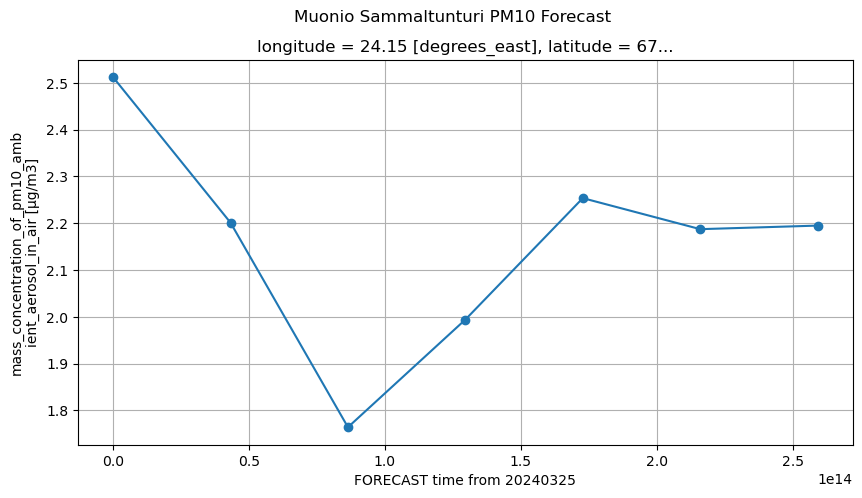

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(True)
plt.suptitle('Muonio Sammaltunturi PM10 Forecast')
pm10_muonio.plot(ax=ax, marker='o')

In [188]:
time_index = pm10_forecast_lev0.indexes['time']
time_index

TimedeltaIndex(['0 days 00:00:00', '0 days 12:00:00', '1 days 00:00:00',
                '1 days 12:00:00', '2 days 00:00:00', '2 days 12:00:00',
                '3 days 00:00:00'],
               dtype='timedelta64[ns]', name='time', freq=None)

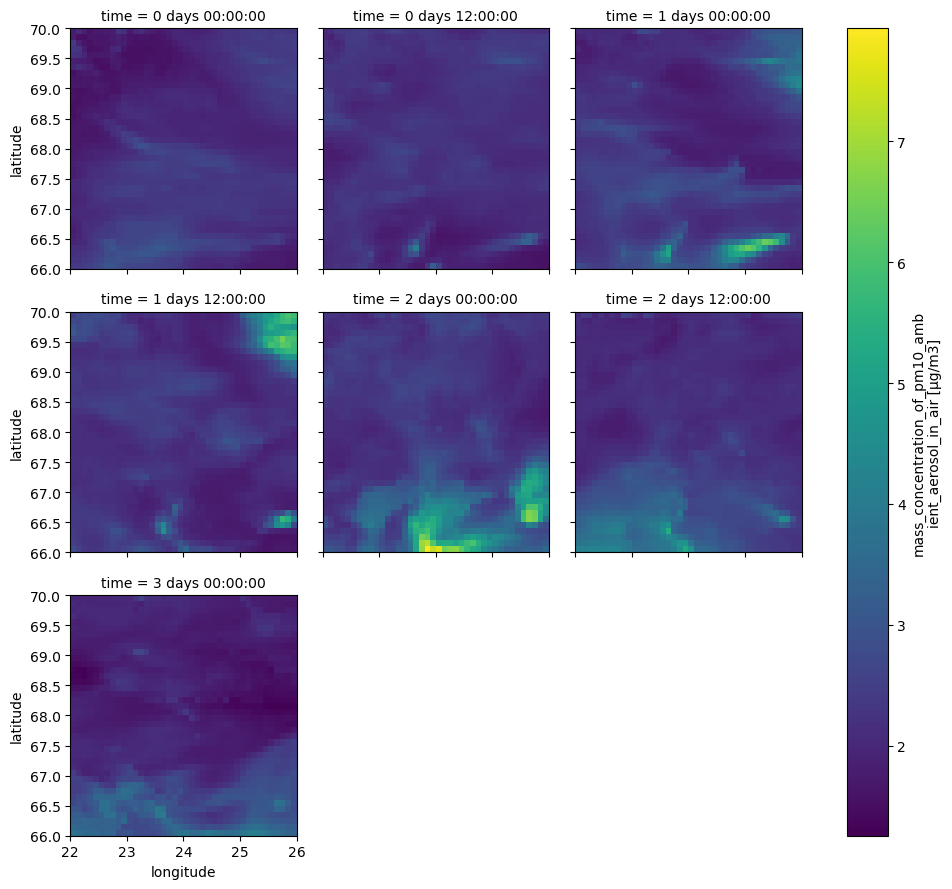

In [187]:
pm10_forecast_lev0.plot(x='longitude', y='latitude', col='time', col_wrap=3)